In [1]:
# Устанавливаем фреймворк университета
!pip install aiuniver

In [2]:
from aiuniver import датасет # Импортируем модуль dataset
from aiuniver import модель # Импортируем модуль model

# Задание №1

1. Используя код ноутбука (блок распознавания рукописных цифр), реализуйте распознавание типов одежды. Для этого скачайте изображения с помощью метода .загрузить_базу_ОДЕЖДА() (Вместо метода .загрузить_базу_МНИСТ())

2. Сделайте аналогичную предобработку данных (так же, как мы делали в случае с цифрами).

3. Создайте модель нейронной сети (можно взять ту же архитектуру, что была на занятии, можно попробовать свою).

4. Обучите нейронную сеть и сделайте оценку точности распознавания. (В параметре "классы" метода тест_модели укажите ['Футболка','Шорты','Свитер','Платье','Плащ','Сандали','Рубашка','Кроссовки','Сумка','Ботинки'])

In [3]:
# Загружаем библиотеки
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta 
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image 
from google.colab import files 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 
import random 
import math
import os 
%matplotlib inline

In [4]:
# подключем диск
from google.colab import drive

In [22]:
# Загружаем датасет одежды
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
                        
print(f"X_train fashion shape:{X_train.shape}") 
print(f"Y_train Fashion shape:{Y_train.shape}")

# Аналогичная предобработка данных
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

(X_train, X_valid) = X_train[5000:], X_train[:5000] 
(Y_train, Y_valid) = Y_train[5000:], Y_train[:5000]

w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_valid = X_valid.reshape(X_valid.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

Y_train = utils.to_categorical(Y_train, 10)
Y_valid = utils.to_categorical(Y_valid, 10)
Y_test = utils.to_categorical(Y_test, 10)

print(f"X_train shape: {X_train.shape}") 
print(f"Y_train shape: {Y_train.shape}" )
print(f'train set: {X_train.shape[0]}')
print(f'validation set: {X_valid.shape[0]}')
print(f'test set: {X_test.shape[0]}')

X_train fashion shape:(60000, 28, 28)
Y_train Fashion shape:(60000,)
X_train shape: (55000, 28, 28, 1)
Y_train shape: (55000, 10)
train set: 55000
validation set: 5000
test set: 10000


In [23]:
# Сверточная Сеть
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

Epoch 1/10
860/860 [==============================] - 3s 4ms/step - loss: 0.6090 - accuracy: 0.7727 - val_loss: 0.3909 - val_accuracy: 0.8590
Epoch 2/10
860/860 [==============================] - 3s 3ms/step - loss: 0.4249 - accuracy: 0.8450 - val_loss: 0.3452 - val_accuracy: 0.8742
Epoch 3/10
860/860 [==============================] - 3s 3ms/step - loss: 0.3759 - accuracy: 0.8627 - val_loss: 0.2950 - val_accuracy: 0.8932
Epoch 4/10
860/860 [==============================] - 3s 3ms/step - loss: 0.3482 - accuracy: 0.8737 - val_loss: 0.2829 - val_accuracy: 0.8970
Epoch 5/10
860/860 [==============================] - 3s 3ms/step - loss: 0.3294 - accuracy: 0.8788 - val_loss: 0.2708 - val_accuracy: 0.9010
Epoch 6/10
860/860 [==============================] - 3s 3ms/step - loss: 0.3134 - accuracy: 0.8850 - val_loss: 0.2564 - val_accuracy: 0.9046
Epoch 7/10
860/860 [==============================] - 3s 3ms/step - loss: 0.3026 - accuracy: 0.8889 - val_loss: 0.2582 - val_accuracy: 0.9040
Epoch 

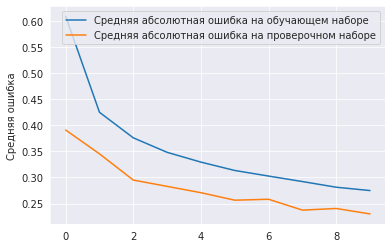

In [24]:
# Обучаем модель
history = model.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_valid, Y_valid))

plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [25]:
score_1 = model.evaluate(X_test, Y_test, verbose=1)

print(f'Model Loss: {round(score_1[0], 2)}')
print(f'Model Score: {round(score_1[1], 2)}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2484 - accuracy: 0.9091
Model Loss: 0.25
Model Score: 0.91


# Задание №2

1. Используя код ноутбука (блок распознавания рукописных цифр), реализуйте распознавание типов одежды. Для этого скачайте изображения с помощью метода .загрузить_базу_ОДЕЖДА() (Вместо метода .загрузить_базу_МНИСТ())

2. Сделайте предобработку данных, указав в качестве параметра "сетка" значение "сверточная" (обратите внимание на размер полученных данных)

3. Создайте сверточную нейронную сеть произвольной архитектуры.

4. Обучите нейронную сеть и сделайте оценку точности распознавания (В параметре "классы" метода тест_модели укажите ['Футболка','Шорты','Свитер','Платье','Плащ','Сандали','Рубашка','Кроссовки','Сумка','Ботинки'])

In [26]:
# Сверточная Сеть
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               3211520   
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2228 - accuracy: 0.9184 - val_loss: 0.2620 - val_accuracy: 0.9084
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2046 - accuracy: 0.9230 - val_loss: 0.2440 - val_accuracy: 0.9144
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1948 - accuracy: 0.9268 - val_loss: 0.2440 - val_accuracy: 0.9164
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1868 - accuracy: 0.9290 - val_loss: 0.2472 - val_accuracy: 0.9176
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1779 - accuracy: 0.9326 - val_loss: 0.2579 - val_accuracy: 0.9142
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1760 - accuracy: 0.9332 - val_loss: 0.2461 - val_accuracy: 0.9208
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1671 - accuracy: 0.9367 - val_loss: 0.2505 - val_accuracy:

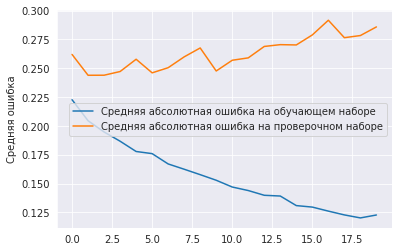

In [30]:
# Обучаем модель
history = model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_valid, Y_valid))

plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [29]:
score_1 = model.evaluate(X_test, Y_test, verbose=1)

print(f'Model Loss: {round(score_1[0], 2)}')
print(f'Model Score: {round(score_1[1], 2)}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2509 - accuracy: 0.9105
Model Loss: 0.25
Model Score: 0.91


# Задание №3

1. Скачайте базу кожных заболеваний (по аналогии с базой автомобилей), используя метод .загрузить_базу_БОЛЕЗНИ()

2. Посмотрите примеры изображений

3. Создайте обучающую и проверочную выборки (по аналогии с базой автомобилей)

4. Создайте сверточную нейронную сеть произвольной архитектуры (обратите внимание, что у нас в базе 10 классов)

5. Обучите нейронную сеть и сделайте оценку точности распознавания (В параметре "классы" метода тест_модели укажите  ['Акне', 'Витилиго', 'Герпес', 'Дерматит', 'Лишай', 'Невус', 'Псориаз', 'Сыпь', 'Хлоазма', 'Экзема'])

In [49]:
className = ['Акне', 'Витилиго', 'Герпес', 'Дерматит', 'Лишай', 'Невус', 'Псориаз', 'Сыпь', 'Хлоазма', 'Экзема']

In [50]:
датасет.загрузить_базу_БОЛЕЗНИ()

Загрузка данных (Готово)
База загружена в Google Colaboratory


In [51]:
!ls diseases/origin

Акне  Витилиго	Герпес	Дерматит  Лишай  Невус	Псориаз  Сыпь  Хлоазма	Экзема


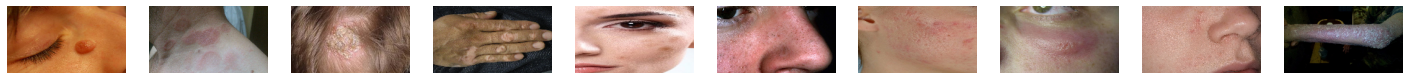

In [52]:
# Примеры из базы
датасет.показать_примеры(путь='/content/diseases/origin')

In [53]:
# Создаем обучающую и проверочную выборки
(x_train, y_train), (x_test, y_test) = датасет.создать_выборки(
                                                путь='/content/diseases/origin',
                                                размер = (54, 96))

Созданы выборки: 
Размер сформированного массива x_train: (4530, 54, 96, 3)
Размер сформированного массива y_train: (4530,)
Размер сформированного массива x_train: (499, 54, 96, 3)
Размер сформированного массива y_train: (499,)


In [57]:
#Создаем последовательную модель
model = Sequential() 
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(54, 96, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(124, activation = 'relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(3e-4), metrics='accuracy')
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 54, 96, 32)        896       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 54, 96, 32)        9248      
_________________________________________________________________
dropout_16 (Dropout)         (None, 54, 96, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 27, 48, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 27, 48, 64)        18496     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 27, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 24, 64)      

Epoch 1/10
284/284 [==============================] - 1s 5ms/step - loss: 1.0631 - accuracy: 0.6347 - val_loss: 1.9981 - val_accuracy: 0.4088
Epoch 2/10
284/284 [==============================] - 1s 5ms/step - loss: 0.7445 - accuracy: 0.7488 - val_loss: 2.0770 - val_accuracy: 0.4088
Epoch 3/10
284/284 [==============================] - 1s 5ms/step - loss: 0.6098 - accuracy: 0.7927 - val_loss: 2.1653 - val_accuracy: 0.3747
Epoch 4/10
284/284 [==============================] - 1s 5ms/step - loss: 0.5151 - accuracy: 0.8313 - val_loss: 2.7758 - val_accuracy: 0.3707
Epoch 5/10
284/284 [==============================] - 1s 5ms/step - loss: 0.4601 - accuracy: 0.8528 - val_loss: 2.4146 - val_accuracy: 0.4248
Epoch 6/10
284/284 [==============================] - 1s 5ms/step - loss: 0.4089 - accuracy: 0.8667 - val_loss: 2.5998 - val_accuracy: 0.3888
Epoch 7/10
284/284 [==============================] - 1s 5ms/step - loss: 0.3608 - accuracy: 0.8834 - val_loss: 2.7071 - val_accuracy: 0.3948
Epoch 

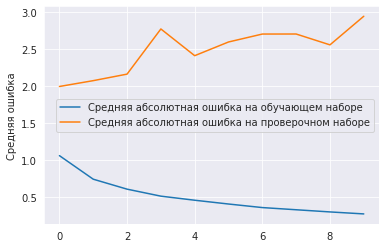

In [59]:
# Обучаем модель
history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test))

plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

Тестовое изображение:


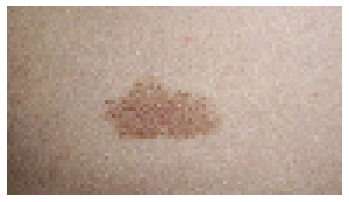


Результат предсказания модели:
Модель распознала модель Акне на 36.23%
Модель распознала модель Витилиго на 5.18%
Модель распознала модель Герпес на 50.07%
Модель распознала модель Дерматит на 0.55%
Модель распознала модель Лишай на 0.02%
Модель распознала модель Невус на 0.45%
Модель распознала модель Псориаз на 1.26%
Модель распознала модель Сыпь на 1.31%
Модель распознала модель Хлоазма на 4.91%
Модель распознала модель Экзема на 0.02%


Правильные ответ:  Акне


In [60]:
# Тестируем модель
модель.тест_модели(
    модель=model,
    тестовый_набор = x_test,
    правильные_ответы = y_test,
    классы = className)